In [1]:
import pprint
import numpy as np 

## Importing library for MetaprivBIDS

In [2]:
from metaprivBIDS.corelogic.metapriv_corelogic import metaprivBIDS_core_logic

metapriv = metaprivBIDS_core_logic()
print("Core logic imported and initialized successfully!")

Core logic imported and initialized successfully!


In [3]:
# Load the data
data_info = metapriv.load_data('Use_Case_Data/adult_mini.csv')

# Inspect {column, unique value count, column type}
data = data_info["data"]
print("Column Types:",'\n')
print(data_info["column_types"],'\n')

print(print(data.dtypes,'\n'))

# Select Quasi-Identifiers
selected_columns = ["age", "education", "marital-status", "occupation", "relationship","sex","salary-class"]
results = metapriv.find_lowest_unique_columns(data, selected_columns)
print('Find Influential Columns:','\n')
pprint.pprint(results)

Column Types: 

[('age', 51, 'Continuous'), ('education', 14, 'Categorical'), ('marital-status', 7, 'Categorical'), ('occupation', 12, 'Categorical'), ('relationship', 6, 'Categorical'), ('sex', 2, 'Categorical'), ('salary-class', 2, 'Categorical'), ('disease', 5, 'Categorical'), ('exercise_weekly_hours', 6, 'Categorical')] 

age                       int64
education                object
marital-status           object
occupation               object
relationship             object
sex                      object
salary-class             object
disease                  object
exercise_weekly_hours     int64
dtype: object 

None
Find Influential Columns: 

{'age': {'difference': 58,
         'normalized_difference': 1.1,
         'unique_count_after_removal': 122},
 'education': {'difference': 14,
               'normalized_difference': 1.0,
               'unique_count_after_removal': 166},
 'marital-status': {'difference': 2,
                    'normalized_difference': 0.3,
        

## Dataset Information 

In [41]:
metapriv.calculate_unique_rows(data, selected_columns, sensitive_attr='disease')

{'total_rows': 200,
 'total_columns': 9,
 'num_selected_columns': 7,
 'num_unique_rows': 180,
 'k_anonymity': 1,
 'l_diversity': 1}

## Personal information Factor (PIF)

In [9]:
pif_value, cig_df = metapriv.compute_cig(data, selected_columns)
print("PIF Value:", pif_value)
print("CIG DataFrame:")
cig_df

Enter a mask value (or leave blank to skip):nan
Enter percentile (0-100): 95
PIF Value: 21.8882683519949
CIG DataFrame:


,age,education,marital-status,occupation,relationship,sex,salary-class,RIG
169,7.643856,4.473931,6.058894,2.888969,2.029146,1.736966,0.386468,25.218230
167,5.643856,3.836501,6.058894,5.321928,3.395929,0.514573,0.386468,25.158149
37,5.321928,1.785875,7.643856,3.473931,4.058894,1.736966,0.386468,24.407918
195,5.321928,6.643856,1.029146,5.321928,4.836501,0.514573,0.386468,24.054402
6,4.836501,5.321928,6.058894,3.184425,2.029146,1.736966,0.386468,23.554328
...,...,...,...,...,...,...,...,...
136,2.874467,1.785875,1.029146,3.000000,1.268817,0.514573,0.386468,10.859346
132,2.874467,1.785875,1.029146,3.000000,1.268817,0.514573,0.386468,10.859346
29,2.874467,1.785875,1.029146,3.000000,1.268817,0.514573,0.386468,10.859346
65,2.874467,1.785875,1.029146,3.000000,1.268817,0.514573,0.386468,10.859346


In [10]:
columns_to_sum = [col for col in cig_df.columns if col != 'RIG']
column_sums = cig_df[columns_to_sum].sum()
column_sums

age               997.647833
education         569.388028
marital-status    354.753831
occupation        629.661075
relationship      431.933808
sex               174.258180
salary-class      157.325222
dtype: float64

Outliers detected in column 'RIG' above threshold 2.5:
Index: 169, Value: 25.218230041679757, Z-Score: 2.809188988099669
Index: 167, Value: 25.158149437675746, Z-Score: 2.7901779948713976
Index: 37, Value: 24.4079182979435, Z-Score: 2.5527862549991385


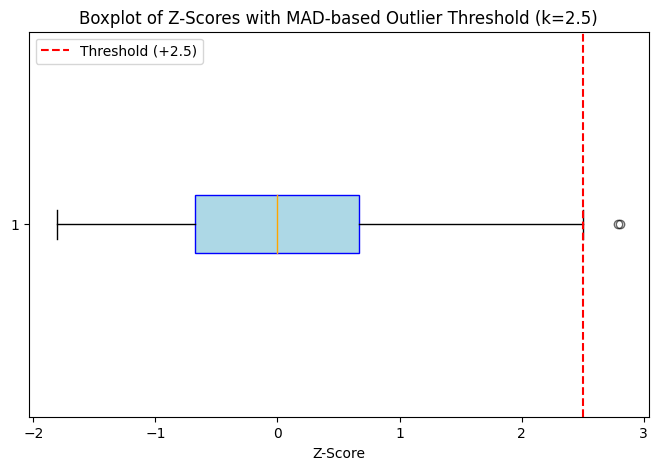

In [11]:
metapriv.save_boxplot(cig_df, column_name="RIG", k=2.5)

## Sample Unique Detection Algorithm (SUDA)

In [23]:
results_suda = metapriv.compute_suda2(data, selected_columns, sample_fraction=0.2, missing_value= np.nan)
# Print the results
print("Data with Scores & Dis-Scores:")
print("\nAttribute Contributions:")
print(results_suda["attribute_contributions"])

print("\nAttribute Level Contributions:")
pprint.pprint(results_suda["attribute_level_contributions"])
results_suda = results_suda["data_with_scores"].sort_values(by="dis-score", ascending=False)
results_suda

Data with Scores & Dis-Scores:

Attribute Contributions:
         variable  contribution
0             age         73.74
3      occupation         38.36
1       education         33.39
4    relationship         20.74
2  marital-status         17.61
5             sex          9.71
6    salary-class          7.43

Attribute Level Contributions:
        variable  attribute  contribution
13           age       31.0          4.16
25           age       43.0          3.39
28           age       46.0          3.29
27           age       45.0          3.25
22           age       40.0          3.20
..           ...        ...           ...
90  relationship        5.0         12.16
94  salary-class        1.0         65.02
93  salary-class        0.0         34.98
91           sex        0.0         62.57
92           sex        1.0         37.43

[95 rows x 3 columns]


,age,education,marital-status,occupation,relationship,sex,salary-class,dis-score,score
160,68,2,0,-1,1,0,0,0.9716,1440.0
106,17,0,4,-1,3,0,0,0.9636,1128.0
167,46,11,6,8,4,1,0,0.9628,1104.0
169,66,7,6,7,1,0,0,0.9624,1092.0
37,19,10,1,0,5,0,0,0.9622,1086.0
...,...,...,...,...,...,...,...,...,...
138,20,13,4,9,3,1,0,0.0000,0.0
47,44,11,0,2,4,0,0,0.0000,0.0
124,19,13,4,6,3,1,0,0.0000,0.0
162,44,11,0,2,4,0,0,0.0000,0.0


##### Here you can choose to find outliers for the raw score "score" or the normalised score "dis-score"

Outliers detected in column 'score' above threshold 2.5:
Index: 160, Value: 1440.0, Z-Score: 6.023441860465116
Index: 106, Value: 1128.0, Z-Score: 4.392093023255814
Index: 167, Value: 1104.0, Z-Score: 4.26660465116279
Index: 169, Value: 1092.0, Z-Score: 4.203860465116279
Index: 37, Value: 1086.0, Z-Score: 4.1724883720930235
Index: 77, Value: 1080.0, Z-Score: 4.1411162790697675
Index: 6, Value: 984.0, Z-Score: 3.6391627906976742
Index: 157, Value: 984.0, Z-Score: 3.6391627906976742
Index: 61, Value: 966.0, Z-Score: 3.545046511627907
Index: 144, Value: 888.0, Z-Score: 3.1372093023255814
Index: 27, Value: 840.0, Z-Score: 2.8862325581395347
Index: 195, Value: 840.0, Z-Score: 2.8862325581395347
Index: 148, Value: 840.0, Z-Score: 2.8862325581395347
Index: 74, Value: 816.0, Z-Score: 2.760744186046512
Index: 21, Value: 792.0, Z-Score: 2.6352558139534885
Index: 100, Value: 774.0, Z-Score: 2.541139534883721


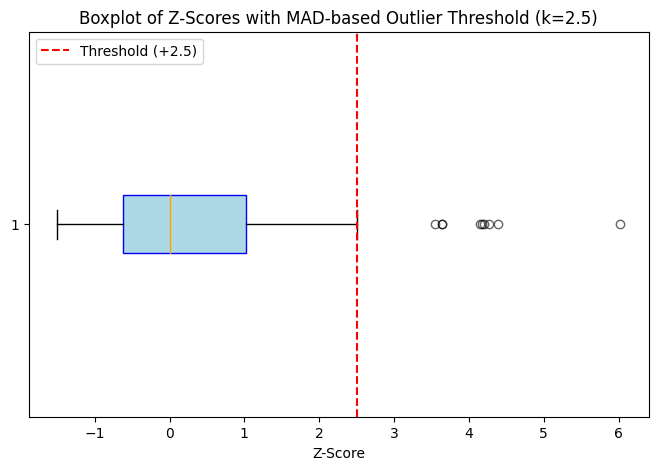

In [15]:
metapriv.save_boxplot(results_suda, column_name="score", k=2.5)

## Overview of result


- k-Anonymity = 1 

- L-diversity = 1

Number of unique rows 190
_________________

- According to K-global
{age (1.1) , education (1.0), occupation (0.5)} are the variables that has the highest normalized effect on k-anonymity. 

- PIF 

95% of rows have row information gain under og equal to 21.9
from outlier detection we find 3 rows of high risk. 

    - Index: 169, Value: 25.218230041679757, Z-Score: 2.809188988099669
    - Index: 167, Value: 25.158149437675746, Z-Score: 2.7901779948713976
    - Index: 37, Value: 24.4079182979435, Z-Score: 2.5527862549991385

PIF Identifies 

- age               997.647833
- occupation        629.661075
- education         569.388028


As the 3 higest contributing variables to re-identifcation. 



- SUDA 

From suda we find 16 outliers 

    - Index: 160, Value: 1440.0, Z-Score: 6.023441860465116
    - Index: 106, Value: 1128.0, Z-Score: 4.392093023255814
    - Index: 167, Value: 1104.0, Z-Score: 4.26660465116279
    - Index: 169, Value: 1092.0, Z-Score: 4.203860465116279
    - Index: 37, Value: 1086.0, Z-Score: 4.1724883720930235
    - Index: 77, Value: 1080.0, Z-Score: 4.1411162790697675
    - Index: 6, Value: 984.0, Z-Score: 3.6391627906976742
    - Index: 157, Value: 984.0, Z-Score: 3.6391627906976742
    - Index: 61, Value: 966.0, Z-Score: 3.545046511627907
    - Index: 144, Value: 888.0, Z-Score: 3.1372093023255814
    - Index: 27, Value: 840.0, Z-Score: 2.8862325581395347
    - Index: 195, Value: 840.0, Z-Score: 2.8862325581395347
    - Index: 148, Value: 840.0, Z-Score: 2.8862325581395347
    - Index: 74, Value: 816.0, Z-Score: 2.760744186046512
    - Index: 21, Value: 792.0, Z-Score: 2.6352558139534885
    - Index: 100, Value: 774.0, Z-Score: 2.541139534883721

SUDA identifies

- age         73.74
- occupation         38.36
- education         33.39

As the 3 higest contributing variables to re-identifcation. 

## Lowering the risk 
 

In [4]:
data.head(5)

,age,education,marital-status,occupation,relationship,sex,salary-class,disease,exercise_weekly_hours
0,39,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,<=50K,Hypertension,2
1,50,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,<=50K,Asthma,0
2,38,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,<=50K,Diabetes,6
3,53,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,<=50K,Diabetes,10
4,28,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,<=50K,Cancer,2


## Generalizing values

The function below can be re-run as many times as needed. Here 
('HS-grad', '11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th') has been made into 'K-12 Education'.
Additionally 'Assoc-acdm' and 'Assoc-voc' has been made into 'Assoc'.

The function keep track of your changes into the column, hence it does not overwrite if you keep combinging values within the same column.

If you change column use new safed dataset. 

In [7]:
data_mod = metapriv.combine_values(data_mod, 'education')

Unique values in 'education': ['Bachelors' 'K-12 Education' 'Masters' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' 'Doctorate' 'Prof-school']
Enter values to combine in 'education' (comma-separated): 'Assoc-acdm','Assoc-voc'
Enter the replacement value: Assoc-Degree


Making 'Widowed','Separated', 'Divorced','Married-spouse-absent','Never-married' into 'Single' 
and 'Married-civ-spouse','Married-AF-spouse' into 'Married'

In [9]:
data_mod = metapriv.combine_values(data_mod, 'marital-status')

Unique values in 'marital-status': ['Single' 'Married-civ-spouse' 'Married-AF-spouse']
Enter values to combine in 'marital-status' (comma-separated): 'Married-civ-spouse','Married-AF-spouse'
Enter the replacement value: Married


Changing 'Handlers-cleaners','Craft-repair', 'Transport-moving','Farming-fishing','Machine-op-inspct' into 'Manual/Blue-Collar' & 'Other-service' ,'Sales' ,'Tech-support' ,'Protective-serv' into 'Services'

In [20]:
data_mod = metapriv.combine_values(data_mod, 'occupation')

Unique values in 'occupation': ['Adm-clerical' 'Exec-managerial' 'Manual/Blue-Collar' 'Prof-specialty'
 'Other-service' 'Sales' 'Tech-support' nan 'Protective-serv']
Enter values to combine in 'occupation' (comma-separated):  'Other-service' ,'Sales' ,'Tech-support' ,'Protective-serv'
Enter the replacement value: Services


In extension we see that both marital-status and relationship is available hence we remove relationship. 

In [31]:
data_mod = data_mod.drop(columns=['relationship'])

In [32]:
data_mod.head(5)

,age,education,marital-status,occupation,sex,salary-class,disease,exercise_weekly_hours
0,37.430742,Bachelors,Single,Adm-clerical,Male,<=50K,Hypertension,2
1,51.238954,Bachelors,Married,Exec-managerial,Male,<=50K,Asthma,0
2,38.541960,K-12 Education,Single,Manual/Blue-Collar,Male,<=50K,Diabetes,6
3,52.473662,K-12 Education,Married,Manual/Blue-Collar,Male,<=50K,Diabetes,10
4,28.590703,Bachelors,Married,Prof-specialty,Female,<=50K,Cancer,2


## Adding noise to 'age' variable

In [33]:
data_mod_noise = metapriv.add_noise(data_mod, 'age', 'normal')

In [34]:
data_mod_noise.head(3)

,age,education,marital-status,occupation,sex,salary-class,disease,exercise_weekly_hours
0,36.375526,Bachelors,Single,Adm-clerical,Male,<=50K,Hypertension,2
1,49.563593,Bachelors,Married,Exec-managerial,Male,<=50K,Asthma,0
2,37.991865,K-12 Education,Single,Manual/Blue-Collar,Male,<=50K,Diabetes,6


## Modified Dataset Information

In [35]:
selected_columns = ["education", "marital-status", "occupation","sex","salary-class"]
metapriv.calculate_unique_rows(data_mod_noise, selected_columns, sensitive_attr='disease')

{'total_rows': 200,
 'total_columns': 8,
 'num_selected_columns': 5,
 'num_unique_rows': 41,
 'k_anonymity': 1,
 'l_diversity': 1}

In [36]:
results = metapriv.find_lowest_unique_columns(data_mod_noise, selected_columns)
print('Find Influential Columns:','\n')
pprint.pprint(results)

Find Influential Columns: 

{'education': {'difference': 35,
               'normalized_difference': 5.0,
               'unique_count_after_removal': 6},
 'marital-status': {'difference': 12,
                    'normalized_difference': 6.0,
                    'unique_count_after_removal': 29},
 'occupation': {'difference': 28,
                'normalized_difference': 5.6,
                'unique_count_after_removal': 13},
 'salary-class': {'difference': 16,
                  'normalized_difference': 8.0,
                  'unique_count_after_removal': 25},
 'sex': {'difference': 18,
         'normalized_difference': 9.0,
         'unique_count_after_removal': 23}}


## PIF for Modified Dataset

In [41]:
pif_value, cig_df = metapriv.compute_cig(data_mod_noise, selected_columns)
print("PIF Value:", pif_value)
print("CIG DataFrame:")
cig_df

Enter a mask value (or leave blank to skip):nan
Enter percentile (0-100): 95
PIF Value: 8.46248663983755
CIG DataFrame:


,education,marital-status,occupation,sex,salary-class,RIG
52,6.643856,1.014500,2.888969,0.125769,2.089267,12.762361
89,2.625824,0.985645,2.888969,1.736966,2.089267,10.326671
63,2.343309,1.014500,2.888969,0.514573,2.089267,8.850618
189,2.343309,1.014500,2.888969,0.514573,2.089267,8.850618
20,2.343309,1.014500,2.888969,0.514573,2.089267,8.850618
...,...,...,...,...,...,...
31,0.124624,0.017799,0.430256,0.013419,0.386468,0.972567
124,0.124624,0.017799,0.430256,0.013419,0.386468,0.972567
157,0.124624,0.017799,0.430256,0.013419,0.386468,0.972567
64,0.124624,0.017799,0.430256,0.013419,0.386468,0.972567


In [42]:
columns_to_sum = [col for col in cig_df.columns if col != 'RIG']
column_sums = cig_df[columns_to_sum].sum()
column_sums

education         173.840952
marital-status     96.814132
occupation        172.934479
sex                84.993907
salary-class       87.717054
dtype: float64

Outliers detected in column 'RIG' above threshold 2.5:
Index: 52, Value: 12.762361168676165, Z-Score: 8.354017992793137
Index: 89, Value: 10.326670676488622, Z-Score: 6.398413080654351
Index: 63, Value: 8.850617558582824, Z-Score: 5.2132966887264685
Index: 189, Value: 8.850617558582824, Z-Score: 5.2132966887264685
Index: 20, Value: 8.850617558582824, Z-Score: 5.2132966887264685
Index: 96, Value: 8.850617558582824, Z-Score: 5.2132966887264685
Index: 19, Value: 8.803950787734188, Z-Score: 5.175828148861503
Index: 197, Value: 8.803950787734188, Z-Score: 5.175828148861503
Index: 125, Value: 8.607318207170971, Z-Score: 5.017952736665517
Index: 143, Value: 8.475271180981114, Z-Score: 4.911932774819593
Index: 111, Value: 8.461813769251048, Z-Score: 4.901127879629335
Index: 67, Value: 7.785192289670676, Z-Score: 4.357871544980021
Index: 8, Value: 7.593273869608209, Z-Score: 4.203781110991016
Index: 102, Value: 6.637093179377927, Z-Score: 3.436067946816699
Index: 4, Value: 6.490125391729949, Z-

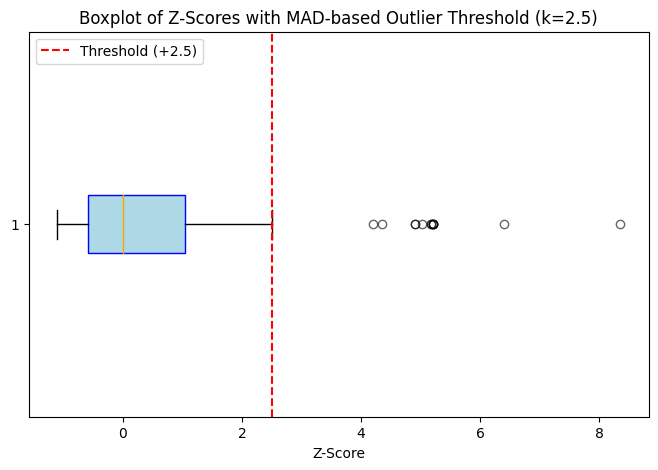

In [38]:
metapriv.save_boxplot(cig_df, column_name="RIG", k=2.5)

## SUDA for Modified Dataset 

In [39]:
results_suda = metapriv.compute_suda2(data_mod_noise, selected_columns, sample_fraction=0.2, missing_value= np.nan)
# Print the results
print("Data with Scores & Dis-Scores:")
print("\nAttribute Contributions:")
print(results_suda["attribute_contributions"])

print("\nAttribute Level Contributions:")
pprint.pprint(results_suda["attribute_level_contributions"])
results_suda = results_suda["data_with_scores"].sort_values(by="dis-score", ascending=False)
results_suda

Data with Scores & Dis-Scores:

Attribute Contributions:
         variable  contribution
0       education         89.58
2      occupation         71.53
3             sex         52.78
4    salary-class         44.44
1  marital-status         41.67

Attribute Level Contributions:
          variable  attribute  contribution
6        education        6.0         18.60
0        education        0.0         17.83
1        education        1.0         17.05
4        education        4.0         16.28
3        education        3.0         11.63
2        education        2.0          9.30
5        education        5.0          9.30
7   marital-status        0.0         50.00
8   marital-status        1.0         50.00
11      occupation        1.0         21.36
9       occupation       -1.0         20.39
10      occupation        0.0         19.42
13      occupation        3.0         15.53
14      occupation        4.0         12.62
12      occupation        2.0         10.68
18    salary-cl

,education,marital-status,occupation,sex,salary-class,dis-score,score
89,2,1,3,0,1,0.6741,12.0
52,5,0,3,0,1,0.5267,7.0
187,1,1,-1,0,0,0.4825,6.0
167,4,1,4,1,0,0.4825,6.0
143,0,1,3,0,1,0.4825,6.0
...,...,...,...,...,...,...,...
86,3,0,4,1,1,0.0000,0.0
88,3,1,4,1,0,0.0000,0.0
11,1,0,3,1,1,0.0000,0.0
90,0,0,3,1,0,0.0000,0.0


In [40]:
metapriv.save_boxplot(results_suda, column_name="score", k=2.5)

Outliers detected in column 'score':
Index: 89, Value: 12.0, Z-Score: inf
Index: 52, Value: 7.0, Z-Score: inf
Index: 187, Value: 6.0, Z-Score: inf
Index: 167, Value: 6.0, Z-Score: inf
Index: 143, Value: 6.0, Z-Score: inf
Index: 27, Value: 6.0, Z-Score: inf
Index: 111, Value: 6.0, Z-Score: inf
Index: 154, Value: 5.0, Z-Score: inf
Index: 67, Value: 5.0, Z-Score: inf
Index: 84, Value: 5.0, Z-Score: inf
Index: 0, Value: 4.0, Z-Score: inf
Index: 137, Value: 4.0, Z-Score: inf
Index: 125, Value: 4.0, Z-Score: inf
Index: 7, Value: 4.0, Z-Score: inf
Index: 164, Value: 4.0, Z-Score: inf
Index: 50, Value: 4.0, Z-Score: inf
Index: 53, Value: 3.0, Z-Score: inf
Index: 100, Value: 3.0, Z-Score: inf
Index: 4, Value: 3.0, Z-Score: inf
Index: 8, Value: 2.0, Z-Score: inf
Index: 98, Value: 2.0, Z-Score: inf
Index: 139, Value: 2.0, Z-Score: inf
Index: 166, Value: 2.0, Z-Score: inf
Index: 184, Value: 2.0, Z-Score: inf
Index: 57, Value: 2.0, Z-Score: inf
Index: 33, Value: 2.0, Z-Score: inf
Index: 127, Value:

## Overview of result after modification 


- k-Anonymity = 1 

- L-diversity = 1

Number of unique rows 41
_________________

- According to K-global
{sex (1.1) , salary-class (1.0), marital-status (0.5)} are the variables that has the highest normalized effect on k-anonymity. 
This change makes sense because we have generalised catgorical variables into larger groups e.g. 'husband' and 'wife' became spouse.

- PIF 

95% of rows have row information gain under og equal to 8.46 (This means that out changes have resulted in a large reduction of information gain an adversary can obtain, subsequently making it much safer) 

We identify 24 rows as outliers. The increase in outliers happens because some subject have been partioned into large groups due to the generalisation technique applied. Meaning that other subject now stand more out.   

 
PIF Identifies 

- education         173.84
- occupation        172.93
- marital-status     96.81


As the 3 higest contributing variables to re-identifcation. 



- SUDA 

From suda we find 48 outlier. 



SUDA identifies

- education         89.58
- occupation         71.53
- sex         52.78

As the 3 higest contributing variables to re-identifcation. 